<a href="https://colab.research.google.com/github/DanielProanoGuevara/SistemasCognitivosArtificiales/blob/master/Accel_Eyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importar librerias
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import keras

Crear carpeta para la carga del dataset que se utilizará en el ejercicio, y copiar los elementos de Drive

**disclaimer: database kindly provided by the Messidor program partners (see http://www.adcis.net/en/third-party/messidor/).**

Decencière et al.. Feedback on a publicly distributed database: the Messidor database.
Image Analysis & Stereology, v. 33, n. 3, p. 231-234, aug. 2014. ISSN 1854-5165.
Available at: http://www.ias-iss.org/ojs/IAS/article/view/1155 or
http://dx.doi.org/10.5566/ias.1155.

In [ ]:
!mkdir /content/sample_data/datasets
!cp /content/drive/MyDrive/DannyTorres/Base_de_datos_messidor.zip /content/sample_data/datasets

mkdir: cannot create directory ‘/content/sample_data/datasets’: File exists


In [ ]:
!unzip "/content/sample_data/datasets/Base_de_datos_messidor.zip" -d "/content/sample_data/datasets"

Archive:  /content/sample_data/datasets/Base_de_datos_messidor.zip
   creating: /content/sample_data/datasets/Base de datos messidor/
   creating: /content/sample_data/datasets/Base de datos messidor/Base11/
  inflating: /content/sample_data/datasets/Base de datos messidor/Base11/20051019_38557_0100_PP.tif  
  inflating: /content/sample_data/datasets/Base de datos messidor/Base11/20051020_43808_0100_PP.tif  
  inflating: /content/sample_data/datasets/Base de datos messidor/Base11/20051020_43832_0100_PP.tif  
  inflating: /content/sample_data/datasets/Base de datos messidor/Base11/20051020_43882_0100_PP.tif  
  inflating: /content/sample_data/datasets/Base de datos messidor/Base11/20051020_43906_0100_PP.tif  
  inflating: /content/sample_data/datasets/Base de datos messidor/Base11/20051020_44261_0100_PP.tif  
  inflating: /content/sample_data/datasets/Base de datos messidor/Base11/20051020_44284_0100_PP.tif  
  inflating: /content/sample_data/datasets/Base de datos messidor/Base11/20051

Analizar el tipo de datos de cada superset

(1488, 2240, 3)


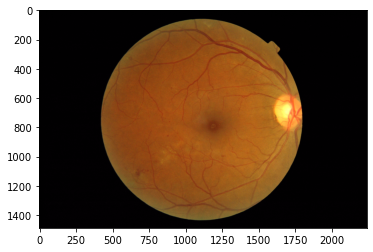

In [ ]:
pic1 = cv2.imread(r'/content/sample_data/datasets/Base de datos messidor/Base11/20051019_38557_0100_PP.tif')
pic1 = cv2.cvtColor(pic1, cv2.COLOR_BGR2RGB)
print(pic1.shape)
plt.imshow(pic1)

(960, 1440, 3)


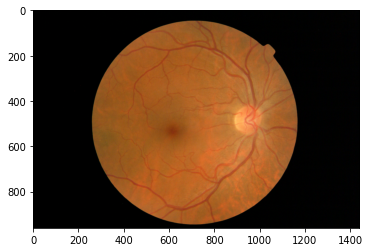

In [ ]:
pic2 = cv2.imread(r'/content/sample_data/datasets/Base de datos messidor/Base21/20051216_43814_0200_PP.tif')
pic2 = cv2.cvtColor(pic2, cv2.COLOR_BGR2RGB)
print(pic2.shape)
plt.imshow(pic2)

(960, 1440, 3)


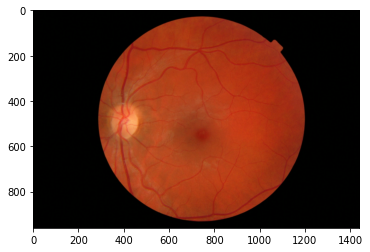

In [ ]:
pic3 = cv2.imread(r'/content/sample_data/datasets/Base de datos messidor/Base31/20051109_57451_0400_PP.tif')
pic3 = cv2.cvtColor(pic3, cv2.COLOR_BGR2RGB)
print(pic3.shape)
plt.imshow(pic3)

Las imágenes tienen tamaños diferentes, y  la información ofrecida por el propietario de la base de datos: "Images were captured using 8 bits per color plane at 1440x960, 2240x1488 or 2304x1536 pixels.", La fuente de la base de datos sugiere que las imágenes sean reescaladas a 1440x960 pixeles, por efectos de optimización de recursos de hardware, se reescalarán a 960x640

Es necesario importar las estructuras con las rutas y los resultados de cada subset para reconstruir toda la base de datos como una sola

In [ ]:
#Crear estructuras que contienen a los elementos del dataset
X = [] #contiene las imágenes a color
X_b = [] #contiene las imágenes a b/n
y = [] #contiene los valores de resultado
dim = (960,640) #tupla con el tamaño para redimensionar las imágenes

In [ ]:
#Importar la estructura con las rutas y resultados
df = pd.read_excel(r'/content/sample_data/datasets/Base de datos messidor/Base11/Annotation_Base11.xls')
df.head()

,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema
0,20051019_38557_0100_PP.tif,Service Ophtalmologie Lariboisière,3,1
1,20051020_43808_0100_PP.tif,Service Ophtalmologie Lariboisière,0,0
2,20051020_43832_0100_PP.tif,Service Ophtalmologie Lariboisière,1,0
3,20051020_43882_0100_PP.tif,Service Ophtalmologie Lariboisière,2,0
4,20051020_43906_0100_PP.tif,Service Ophtalmologie Lariboisière,3,2


De la estructura de datos nos interesa únicamente el nombre de la imagen y el grado de Retinopatía

In [ ]:
#Determinar la ruta donde se encuentran las imágenes
path = r'/content/sample_data/datasets/Base de datos messidor/Base11'

#Anexa las imágenes para la base de datos
for img in df.iloc[:,0]:
    pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,dim, interpolation = cv2.INTER_AREA)
    #pic = pic.astype('float32')
    #pic /= 255.0
    X.append(pic)
    pic = cv2.cvtColor(pic,cv2.COLOR_RGB2GRAY)
    X_b.append(pic)

#Crea una lista con los valores de retinopatía correspondientes a cada imágen
for grade in df.iloc[:,2]:
  y.append(grade)

Repetir el proceso con cada subset

In [ ]:
#subset 12
df12 = pd.read_excel(r'/content/sample_data/datasets/Base de datos messidor/Base12/Annotation Base12.xls')
path = r'/content/sample_data/datasets/Base de datos messidor/Base12'
for img in df12.iloc[:,0]:
    pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,dim, interpolation = cv2.INTER_AREA)
    #pic = pic.astype('float32')
    #pic /= 255.0
    X.append(pic)
    pic = cv2.cvtColor(pic,cv2.COLOR_RGB2GRAY)
    X_b.append(pic)
for grade in df12.iloc[:,2]:
  y.append(grade)
#subset 13
df13 = pd.read_excel(r'/content/sample_data/datasets/Base de datos messidor/Base13/Annotation_Base13.xls')
path = r'/content/sample_data/datasets/Base de datos messidor/Base13'
for img in df13.iloc[:,0]:
    pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,dim, interpolation = cv2.INTER_AREA)
    #pic = pic.astype('float32')
    #pic /= 255.0
    X.append(pic)
    pic = cv2.cvtColor(pic,cv2.COLOR_RGB2GRAY)
    X_b.append(pic)
for grade in df13.iloc[:,2]:
  y.append(grade)
#subset 14
df14 = pd.read_excel(r'/content/sample_data/datasets/Base de datos messidor/Base14/Annotation Base14.xls')
path = r'/content/sample_data/datasets/Base de datos messidor/Base14'
for img in df14.iloc[:,0]:
    pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,dim, interpolation = cv2.INTER_AREA)
    #pic = pic.astype('float32')
    #pic /= 255.0
    X.append(pic)
    pic = cv2.cvtColor(pic,cv2.COLOR_RGB2GRAY)
    X_b.append(pic)
for grade in df14.iloc[:,2]:
  y.append(grade)

In [ ]:
#subset 21
df21 = pd.read_excel(r'/content/sample_data/datasets/Base de datos messidor/Base21/Annotation Base21.xls')
path = r'/content/sample_data/datasets/Base de datos messidor/Base21'
for img in df21.iloc[:,0]:
    pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,dim, interpolation = cv2.INTER_AREA)
    #pic = pic.astype('float32')
    #pic /= 255.0
    X.append(pic)
    pic = cv2.cvtColor(pic,cv2.COLOR_RGB2GRAY)
    X_b.append(pic)
for grade in df21.iloc[:,2]:
  y.append(grade)
#subset 22
df22 = pd.read_excel(r'/content/sample_data/datasets/Base de datos messidor/Base22/Annotation Base22.xls')
path = r'/content/sample_data/datasets/Base de datos messidor/Base22'
for img in df22.iloc[:,0]:
    pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,dim, interpolation = cv2.INTER_AREA)
    #pic = pic.astype('float32')
    #pic /= 255.0
    X.append(pic)
    pic = cv2.cvtColor(pic,cv2.COLOR_RGB2GRAY)
    X_b.append(pic)
for grade in df22.iloc[:,2]:
  y.append(grade)
#subset 23
df23 = pd.read_excel(r'/content/sample_data/datasets/Base de datos messidor/Base23/Annotation Base23.xls')
path = r'/content/sample_data/datasets/Base de datos messidor/Base23'
for img in df23.iloc[:,0]:
    pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,dim, interpolation = cv2.INTER_AREA)
    #pic = pic.astype('float32')
    #pic /= 255.0
    X.append(pic)
    pic = cv2.cvtColor(pic,cv2.COLOR_RGB2GRAY)
    X_b.append(pic)
for grade in df23.iloc[:,2]:
  y.append(grade)
#subset 24
df24 = pd.read_excel(r'/content/sample_data/datasets/Base de datos messidor/Base24/Annotation Base24.xls')
path = r'/content/sample_data/datasets/Base de datos messidor/Base24'
for img in df24.iloc[:,0]:
    pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,dim, interpolation = cv2.INTER_AREA)
    #pic = pic.astype('float32')
    #pic /= 255.0
    X.append(pic)
    pic = cv2.cvtColor(pic,cv2.COLOR_RGB2GRAY)
    X_b.append(pic)
for grade in df24.iloc[:,2]:
  y.append(grade)

In [ ]:
#subset 31
df31 = pd.read_excel(r'/content/sample_data/datasets/Base de datos messidor/Base31/Annotation Base31.xls')
path = r'/content/sample_data/datasets/Base de datos messidor/Base31'
for img in df31.iloc[:,0]:
    pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,dim, interpolation = cv2.INTER_AREA)
    #pic = pic.astype('float32')
    #pic /= 255.0
    X.append(pic)
    pic = cv2.cvtColor(pic,cv2.COLOR_RGB2GRAY)
    X_b.append(pic)
for grade in df31.iloc[:,2]:
  y.append(grade)
#subset 32
df32 = pd.read_excel(r'/content/sample_data/datasets/Base de datos messidor/Base32/Annotation Base32.xls')
path = r'/content/sample_data/datasets/Base de datos messidor/Base32'
for img in df32.iloc[:,0]:
    pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,dim, interpolation = cv2.INTER_AREA)
    #pic = pic.astype('float32')
    #pic /= 255.0
    X.append(pic)
    pic = cv2.cvtColor(pic,cv2.COLOR_RGB2GRAY)
    X_b.append(pic)
for grade in df32.iloc[:,2]:
  y.append(grade)
#subset 33
df33 = pd.read_excel(r'/content/sample_data/datasets/Base de datos messidor/Base33/Annotation Base33.xls')
path = r'/content/sample_data/datasets/Base de datos messidor/Base33'
for img in df33.iloc[:,0]:
    pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,dim, interpolation = cv2.INTER_AREA)
    #pic = pic.astype('float32')
    #pic /= 255.0
    X.append(pic)
    pic = cv2.cvtColor(pic,cv2.COLOR_RGB2GRAY)
    X_b.append(pic)
for grade in df33.iloc[:,2]:
  y.append(grade)
#subset 34
df34 = pd.read_excel(r'/content/sample_data/datasets/Base de datos messidor/Base34/Annotation Base34.xls')
path = r'/content/sample_data/datasets/Base de datos messidor/Base34'
for img in df34.iloc[:,0]:
    pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,dim, interpolation = cv2.INTER_AREA)
    #pic = pic.astype('float32')
    #pic /= 255.0
    X.append(pic)
    pic = cv2.cvtColor(pic,cv2.COLOR_RGB2GRAY)
    X_b.append(pic)
for grade in df34.iloc[:,2]:
  y.append(grade)

In [ ]:
X = np.array(X)
X_b = np.array(X_b)
y = np.array(y)

In [ ]:
X_b.shape

(1200, 640, 960)

In [ ]:
X_b = X_b.reshape(1200,640,960)

In [ ]:
X_b = X_b.astype("float32") / 255.0

(640, 960, 3)


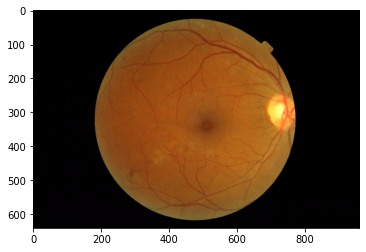

In [ ]:
print(X[0].shape)
plt.imshow(X[0])

Análisis de los datos a utilizar

In [ ]:
print(X.shape)
print(y.shape)

(1200, 640, 960, 3)
(1200,)


In [ ]:
# Vamos a barajar aleatoriamente los datos. Esto es importante ya que si no
# lo hacemos y, por ejemplo, cogemos el 20% de los datos finales como validation
# set, estaremos tomando un grupo reducido de opciones constantes.
perm = np.random.permutation(len(X))
X, X_b, y = X[perm], X_b[perm], y[perm]

**Funciones para comparar visualmente los resultados**

In [ ]:
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()


def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

Importamos los modelos que se van a utilizar

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras import Input

**Establecemos variables e hiperparámetros**

In [ ]:
X.shape[1:]

(640, 960, 3)

In [ ]:
num_clases = 4
input_shape = X.shape[1:]
print("Input shape: ", input_shape)

batch_size = 10
epochs = 30

Input shape:  (640, 960, 3)


**Preprocesamiento de los datos**

In [ ]:
#Normalizamos los valores de entrada
#X = X/255
#X = X.astype('float32')

In [ ]:
#Subdividimos los datos de entrada en train y validation
#Tomamos el ultimo 20% de datos como validación
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=0)


print(X_train.shape)
print(y_train.shape)

labels=y_train;
# Convertimos los vectores de clase Y en matrices de clase binarias
y_train = keras.utils.to_categorical(y_train, num_clases)
y_val = keras.utils.to_categorical(y_val, num_clases)

(960, 640, 960, 3)
(960,)


Se tienen 960 imágenes de train, en formato BGR de 299x299 píxeles

In [ ]:
print(X_val.shape)
print(y_val.shape)

(240, 640, 960, 3)
(240, 4)


Se tienen 240 imágenes de validación, en formato BGR de 640x960 píxeles

Ya que los datos son insuficientes para realizar un entrenamiento adecuado, se decide utilizar la técnica de Data Augmentation para ampliar el dataset

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=20,  
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=True)

In [ ]:
datagen.fit(X_train)

## Construir modelo de CNN

In [ ]:
# Definición del modelo
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding='same',activation='relu', input_shape=input_shape))

model1.add(Conv2D(32, (3, 3),activation='relu'))

model1.add(MaxPooling2D(pool_size=(3, 3)))
model1.add(Dropout(0.2))
model1.add(Conv2D(64, (3, 3), padding='same',activation='relu'))

model1.add(Conv2D(64, (3, 3),activation='relu'))

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))
model1.add(Flatten())

model1.add(Dense(100,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(num_clases, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 640, 960, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 638, 958, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 212, 319, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 212, 319, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 212, 319, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 210, 317, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 105, 158, 64)      0

In [ ]:
# Compilamos el modelo
model1.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.009, decay=1e-6, momentum=0.9, nesterov=True),metrics=['accuracy'])

history1 = model1.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs=epochs,validation_data=(X_val, y_val))

Epoch 1/30
30/30 [==============================] - 35s 1s/step - loss: 1822309393044880110739420872704.0000 - accuracy: 0.4400 - val_loss: 1.3292 - val_accuracy: 0.4042
Epoch 2/30
30/30 [==============================] - 35s 1s/step - loss: 1.2781 - accuracy: 0.4733 - val_loss: 1.3168 - val_accuracy: 0.4042
Epoch 3/30
30/30 [==============================] - 35s 1s/step - loss: 1.2673 - accuracy: 0.4733 - val_loss: 1.3177 - val_accuracy: 0.4042
Epoch 4/30
30/30 [==============================] - 35s 1s/step - loss: 1.2839 - accuracy: 0.4500 - val_loss: 1.3146 - val_accuracy: 0.4042
Epoch 5/30
30/30 [==============================] - 35s 1s/step - loss: 1.2347 - accuracy: 0.4967 - val_loss: 1.3171 - val_accuracy: 0.4042
Epoch 6/30
30/30 [==============================] - 35s 1s/step - loss: 1.2707 - accuracy: 0.4700 - val_loss: 1.3149 - val_accuracy: 0.4042
Epoch 7/30
30/30 [==============================] - 35s 1s/step - loss: 1.2343 - accuracy: 0.4967 - val_loss: 1.3187 - val_accurac

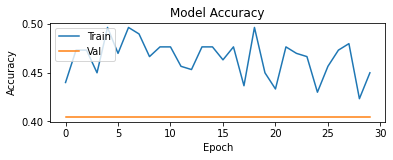

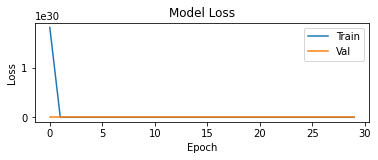

In [ ]:
plt.subplot(2,1,1)
plot_acc(history1)


plt.subplot(2,1,2)
plot_loss(history1)

In [ ]:
# Definición del modelo
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), padding='same',activation='relu', input_shape=input_shape))

model2.add(Conv2D(32, (5, 5),activation='relu'))

model2.add(MaxPooling2D(pool_size=(4, 4)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (5, 5), padding='same',activation='relu'))

model2.add(Conv2D(64, (5, 5),activation='relu'))

model2.add(MaxPooling2D(pool_size=(4, 4)))
model2.add(Dropout(0.5))
model2.add(Conv2D(256, (5, 5), padding='same',activation='relu')) 

model2.add(Conv2D(256, (5, 5),activation='relu'))

model2.add(MaxPooling2D(pool_size=(4, 4)))
model2.add(Flatten())
model2.add(Dense(100,activation='relu'))


model2.add(Dense(num_clases, activation='softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 640, 960, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 636, 956, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 159, 239, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 159, 239, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 159, 239, 64)      51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 155, 235, 64)      102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 58, 64)        0

In [ ]:
# Compilamos el modelo
model2.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.009, decay=1e-6, momentum=0.9, nesterov=True),metrics=['accuracy'])

history2 = model2.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs=epochs,validation_data=(X_val, y_val))

Epoch 1/30
96/96 [==============================] - 114s 1s/step - loss: nan - accuracy: 0.4604 - val_loss: nan - val_accuracy: 0.4417
Epoch 2/30
96/96 [==============================] - 111s 1s/step - loss: nan - accuracy: 0.4583 - val_loss: nan - val_accuracy: 0.4417
Epoch 3/30
96/96 [==============================] - 118s 1s/step - loss: nan - accuracy: 0.4583 - val_loss: nan - val_accuracy: 0.4417
Epoch 4/30
96/96 [==============================] - 117s 1s/step - loss: nan - accuracy: 0.4583 - val_loss: nan - val_accuracy: 0.4417
Epoch 5/30
96/96 [==============================] - 117s 1s/step - loss: nan - accuracy: 0.4583 - val_loss: nan - val_accuracy: 0.4417
Epoch 6/30
96/96 [==============================] - 114s 1s/step - loss: nan - accuracy: 0.4583 - val_loss: nan - val_accuracy: 0.4417
Epoch 7/30
96/96 [==============================] - 116s 1s/step - loss: nan - accuracy: 0.4583 - val_loss: nan - val_accuracy: 0.4417
Epoch 8/30
96/96 [==============================] - 120

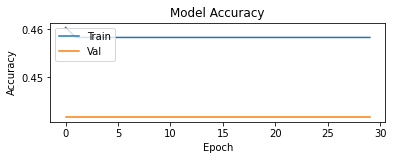

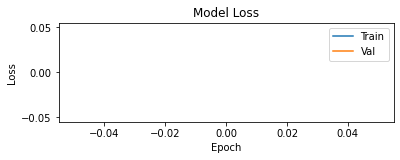

In [ ]:
plt.subplot(2,1,1)
plot_acc(history2)


plt.subplot(2,1,2)
plot_loss(history2)

In [ ]:
#Para esta aplicación se recomienda utilizar transfer learning, con la red Xception
#Se recomienda utilizar en un futuro la base de datos ACRIMA
# Fuente: https://biomedical-engineering-online.biomedcentral.com/articles/10.1186/s12938-019-0649-y
# Fuente:https://ieeexplore.ieee.org/abstract/document/8301998/similar#similar


## Prueba con SVM

In [ ]:
print(X_b[0].shape)

(640, 960)


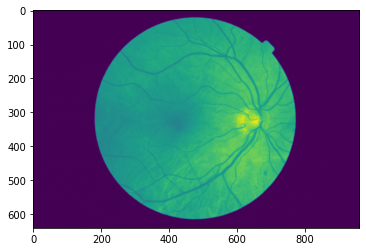

In [ ]:
plt.imshow(X_b[0])

Vamos a transformar la imagen en un vector unidimensional

In [ ]:
print(X_b.shape)

(1200, 640, 960)


In [ ]:
X_b = X_b.reshape(1200, 614400)

Probamos invertir la operación para comprobar la integridad de los vectores que representan las imágenes

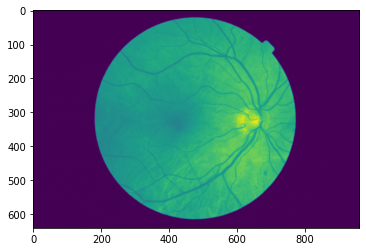

In [ ]:
plt.imshow(X_b[0].reshape(640,960))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
#Evaluamos las métricas del modelo
from sklearn import metrics
print('Precisión del modelo')
print(metrics.accuracy_score(y_test, y_pred))
print('Reporte de clasificación')
print(metrics.classification_report(y_test, y_pred))

Precisión del modelo
0.5041666666666667
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       121
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        50

    accuracy                           0.50       240
   macro avg       0.13      0.25      0.17       240
weighted avg       0.25      0.50      0.34       240



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


La precisión de las SVM es considerablemente más bajo que la de las redes CNN, manteniendo estas últimas una precisión de 0.4

Para corregir esta precisión se recomienda segmentar o realzar las imágenes del dataset, seleccionado la información necesaria para que los clasificadores puedan detectar adecuadamente el grado de retinopatía.